In [1]:
import sys
sys.path.append("..")

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from datasets import *

In [3]:
graduationDistrictDf = get_Graduation(filterBy='district')

In [4]:
list(graduationDistrictDf)

['District',
 'Cohort Year',
 'Cohort Category',
 'Total Cohort #',
 'Total Grads #',
 'Total Grads % of cohort',
 'Total Regents #',
 'Total Regents % of cohort',
 'Total Regents % of grads',
 'Advanced Regents #',
 'Advanced Regents % of cohort',
 'Advanced Regents % of grads',
 'Regents w/o Advanced #',
 'Regents w/o Advanced      % of cohort',
 'Regents w/o Advanced           % of grads',
 'Local #',
 'Local % of cohort',
 'Local % of grads',
 'Still Enrolled #',
 'Still Enrolled % of cohort',
 'Dropped Out #',
 'Dropped Out % of cohort']

In [5]:
graduationDistrictDf.isna().sum()

District                                     0
Cohort Year                                  0
Cohort Category                              0
Total Cohort #                               0
Total Grads #                                0
Total Grads % of cohort                      0
Total Regents #                              0
Total Regents % of cohort                    0
Total Regents % of grads                     0
Advanced Regents #                           0
Advanced Regents % of cohort                 0
Advanced Regents % of grads                  0
Regents w/o Advanced #                       0
Regents w/o Advanced      % of cohort        0
Regents w/o Advanced           % of grads    0
Local #                                      0
Local % of cohort                            0
Local % of grads                             0
Still Enrolled #                             0
Still Enrolled % of cohort                   0
Dropped Out #                                0
Dropped Out %

## Focusing on Year 2010

In [6]:
importantColumns = ['District','Cohort Year','Total Cohort #','Total Grads #','Total Grads % of cohort',
                   'Still Enrolled #','Still Enrolled % of cohort','Dropped Out #','Dropped Out % of cohort'] 
graduationDistrictDfFilterBy2010 = graduationDistrictDf[graduationDistrictDf['Cohort Year']==2010][importantColumns]

Do high school graduation rates with district demographic

## Which district has the highest graduation and highest drop out in year 2010?

In [7]:
graduationRateFiltered = graduationDistrictDfFilterBy2010.groupby('District',as_index=False).mean() \
.sort_values(['Total Grads % of cohort'],ascending=False)

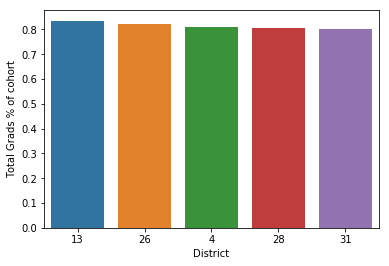

In [8]:
NUM_OF_DISTRICT_BAR_PLOT = 5
sns.barplot(x=graduationRateFiltered[:NUM_OF_DISTRICT_BAR_PLOT]['District'],
            y=graduationRateFiltered[:NUM_OF_DISTRICT_BAR_PLOT]['Total Grads % of cohort'],
            order=graduationRateFiltered[:NUM_OF_DISTRICT_BAR_PLOT]['District'])

### What are some schools in District 13?

In [10]:
get_SchoolsByDistrict(13)

['DR. SUSAN S. MCKINNEY SECONDARY SCHOOL OF THE ARTS',
 'ACADEMY OF BUSINESS AND COMMUNITY DEVELOPMENT',
 'URBAN ASSEMBLY HIGH SCHOOL OF MUSIC AND ART',
 'BROOKLYN COMMUNITY HIGH SCHOOL OF COMMUNICATION, ARTS AND MEDIA',
 'SCIENCE SKILLS CENTER HIGH SCHOOL FOR SCIENCE, TECHNOLOGY AND THE CREATIVE ARTS',
 'BROOKLYN TECHNICAL HIGH SCHOOL',
 'BROOKLYN INTERNATIONAL HIGH SCHOOL',
 'THE URBAN ASSEMBLY SCHOOL FOR LAW AND JUSTICE',
 'ACORN COMMUNITY HIGH SCHOOL',
 'FREEDOM ACADEMY HIGH SCHOOL',
 'URBAN ASSEMBLY INSTITUTE OF MATH AND SCIENCE FOR YOUNG WOMEN',
 'BROOKLYN ACADEMY HIGH SCHOOL',
 'BEDFORD STUYVESANT PREPARATORY HIGH SCHOOL',
 'BEDFORD ACADEMY HIGH SCHOOL',
 'GEORGE WESTINGHOUSE CAREER AND TECHNICAL EDUCATION HIGH SCHOOL',
 'BROOKLYN HIGH SCHOOL FOR LEADERSHIP AND COMMUNITY SERVICE',
 'BENJAMIN BANNEKER ACADEMY',
 'CITY POLYTECHNIC HIGH SCHOOL OF ENGINEERING, ARCHITECTURE, AND TECHNOLOGY']

**Should we filter out specialized HS?**

In [11]:
dropOutRateFiltered = graduationDistrictDfFilterBy2010.groupby('District',as_index=False).mean() \
.sort_values(['Dropped Out % of cohort'],ascending=False)

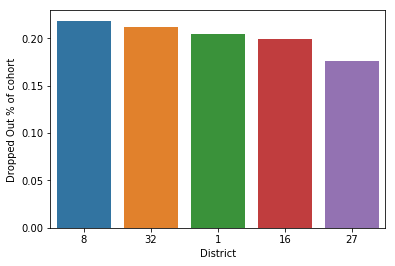

In [12]:
sns.barplot(x=dropOutRateFiltered[:NUM_OF_DISTRICT_BAR_PLOT]['District'],
            y=dropOutRateFiltered[:NUM_OF_DISTRICT_BAR_PLOT]['Dropped Out % of cohort'],
           order=dropOutRateFiltered[:NUM_OF_DISTRICT_BAR_PLOT]['District'])

### What are some schools in District 8?

In [13]:
get_SchoolsByDistrict(8)

['BRONX STUDIO SCHOOL FOR WRITERS AND ARTISTS',
 "WOMEN'S ACADEMY OF EXCELLENCE",
 'RENAISSANCE HIGH SCHOOL FOR MUSICAL THEATER & TECHNOLOGY',
 'GATEWAY SCHOOL FOR ENVIRONMENTAL RESEARCH AND TECHNOLOGY',
 'PABLO NERUDA ACADEMY FOR ARCHITECTURE AND WORLD STUDIES',
 'MILLENNIUM ART ACADEMY',
 'HOLCOMBE L. RUCKER SCHOOL OF COMMUNITY RESEARCH',
 'ARCHIMEDES ACADEMY FOR MATH, SCIENCE AND TECHNOLOGY APPLICATIONS',
 'ANTONIA PANTOJA PREPARATORY ACADEMY, A COLLEGE BOARD SCHOOL',
 'BRONX COMMUNITY HIGH SCHOOL',
 'HERBERT H. LEHMAN HIGH SCHOOL',
 'HERBERT H. LEHMAN YABC',
 'BRONX BRIDGES HIGH SCHOOL',
 'BRONX GUILD',
 'STEVENSON YABC',
 'FELISA RINCON DE GAUTIER INSTITUTE FOR LAW AND PUBLIC POLICY, THE',
 'BANANA KELLY HIGH SCHOOL',
 'BRONX ARENA HIGH SCHOOL',
 'SCHOOL FOR COMMUNITY RESEARCH AND LEARNING',
 'HIGH SCHOOL X560 s BRONX ACADEMY HIGH SCHOOL',
 'JANE ADDAMS HIGH SCHOOL FOR ACADEMIC CAREERS']

## TODO Plan: 
- Look graduation by Borough and see demographic for each borough
- See more data on demographic connection 
- Later connect these findings to ML models
